In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
from generate_plots.uncertainty_quantification import plot_uncertainty_quantification
from generate_plots.value_comparison import plot_bayesian_value, plot_relative_bayesian_value

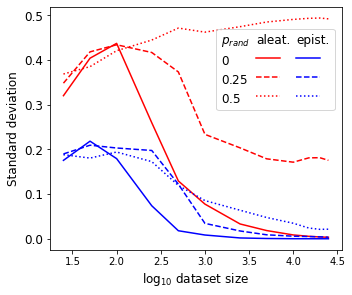

In [2]:
# aleatoric/epistemic uncertainty for different dataset sizes
# a pdf figure is saved in the figures folder

config = json.load(open(os.path.join("experiments","uncertainty_quantification","data","config.json")))
p_succs = config["env_args"]["p_successful_step"]

dataset_sizes = config["data_args"]["num_transitions"]

results_dir = os.path.join("results","uncertainty_quantification")

# load results

epistemic_uncertainties = []
aleatoric_uncertainties = []

for p in p_succs:
    ep_unc = []
    al_unc = []
    for size in dataset_sizes:
        size = str(size)
        ep = np.load(os.path.join(results_dir, f"p_{p}", size, "ep_std.npy"))
        al = np.load(os.path.join(results_dir, f"p_{p}", size, "al_std.npy"))
        ep_unc.append(ep)
        al_unc.append(al)
    epistemic_uncertainties.append(ep_unc)
    aleatoric_uncertainties.append(al_unc)
    
# plot results

plot_uncertainty_quantification(dataset_sizes, p_succs, epistemic_uncertainties, aleatoric_uncertainties, state=0)

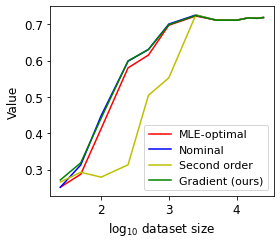

In [3]:
# bayesian values of different policies
num_eval_samples = 10000
seed = 0

config = json.load(open(os.path.join("experiments","policies","data","config.json")))

dataset_sizes = config["data_args"]["num_transitions"]

policies = ["mle", "nominal", "second_order", "grad_stochastic_mle"]
labels = {"mle":"MLE-optimal","grad_stochastic_mle":"Gradient (ours)","msbi":"MSBI","nominal":"Nominal","second_order":"Second order"}

results_dir = os.path.join("results","policies")
values_dict = {}

for policy in policies:
    vals = []
    for dataset_size in dataset_sizes:
        vals.append(np.load(os.path.join(results_dir,policy,str(dataset_size),str(seed),f"value{num_eval_samples}samples.npy")))

    vals = np.array(vals).mean(1)
    values_dict[policy] = vals

plot_bayesian_value(dataset_sizes, policies, labels, values_dict, state=None)

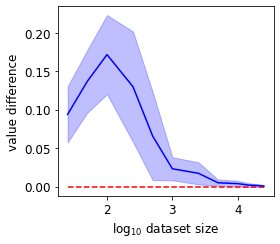

In [4]:
# bayesian values of different policies with error bars
policies = ["mle", "grad_stochastic", "msbi","nominal","second_order"]
reference_policy = "grad_stochastic"
compared_policy = "msbi"

num_eval_samples = 10000
num_seeds = 50

config = json.load(open(os.path.join("experiments","policies","data","config.json")))

dataset_sizes = config["data_args"]["num_transitions"]

labels = {"mle":"MLE-optimal","nominal":"Nominal", "grad":"Gradient Policy", "msbi":"MSBI"}

results_dir = os.path.join("results","policies")
values_dict = {}

for policy in policies:
    values_dict[policy] = {}
    for seed in range(num_seeds):

        vals = []

        for dataset_size in dataset_sizes:
            vals.append(np.load(os.path.join(results_dir,policy,str(dataset_size),str(seed),f"value{num_eval_samples}samples.npy")))

        vals = np.array(vals)
        values_dict[policy][seed] = vals

plot_relative_bayesian_value(dataset_sizes, reference_policy, compared_policy, values_dict, num_seeds, scatter = False, state=None)

In [5]:
policy = "second_order"

loss_dict = {}
first_term_dict = {}
second_term_dict = {}
for seed in range(num_seeds):

    losses = []
    first_terms = []
    second_terms = []

    for dataset_size in dataset_sizes:
        losses.append(np.load(os.path.join(results_dir,policy,str(dataset_size),str(seed),f"losses.npy")))
        first_terms.append(np.load(os.path.join(results_dir,policy,str(dataset_size),str(seed),f"first_terms.npy")))
        second_terms.append(np.load(os.path.join(results_dir,policy,str(dataset_size),str(seed),f"second_terms.npy")))

    losses = np.array(losses)
    first_terms = np.array(first_terms)
    second_terms = np.array(second_terms)
    loss_dict[seed] = losses
    first_term_dict[seed] = first_terms
    second_term_dict[seed] = second_terms
